In [5]:
import re

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#Define file location of downloaded SFR18_2017_Institution_subject_data dataset
SFR_data_fileloc = 'SFR18_2017_Institution_subject_data.csv'

In [4]:
#Read SFR18_2017_Institution_subject_data.csv into pandas
SFR18_2017_Institution_subject_data = pd.read_csv(SFR_data_fileloc, low_memory=False)
#Assign short name 'SFR_data' to database
SFR_data = SFR18_2017_Institution_subject_data
#Check that database has loaded
SFR_data.head()

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
0,10000291,Anglia Ruskin University,East,Agriculture & related subjects,Female,1,30,x,x,x,...,x,x,20,9300,14400,19500,x,x,x,x
1,10007759,Aston University,West Midlands,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,10000571,Bath Spa University,South West,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,10007850,The University of Bath,South West,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,10007152,University of Bedfordshire,East,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [5]:
#Convert columns to proper data types
cols = ['grads','lowerAnnEarn' , 'medianAnnEarn', 'upperAnnEarn' , 'prAttBand']
SFR_data[cols] = SFR_data[cols].apply(pd.to_numeric, errors='coerce')

In [7]:
SFR_data.groupby('subject').size()

subject
Agriculture & related subjects                     1422
Architecture building & planning                   1422
Biological sciences                                1422
Business & administrative studies                  1422
Combined                                           1422
Computer science                                   1422
Creative arts & design                             1422
Economics                                          1422
Education                                          1422
Engineering & technology                           1422
English studies                                    1422
Historical & philosophical studies                 1422
Languages (excluding English studies)              1422
Law                                                1422
Mass communications & documentation                1422
Mathematical sciences                              1422
Medicine & Dentistry                               1422
Nursing                                 

In [79]:
Subject_Name = 'Computer science'
Subject_data_by_university = pd.DataFrame(columns=['providerName','subject', 'mean_lowerAnnEarn' , 'mean_medianAnnEarn', 'mean_upperAnnEarn' , 'mean_prAttBand'] )
Subject_data = SFR_data[SFR_data['subject'] == Subject_Name]

In [87]:
Subject_data_by_university = pd.DataFrame(columns=['providerName', 'mean_lowerAnnEarn' , 'mean_medianAnnEarn', 'mean_upperAnnEarn' , 'mean_prAttBand'] )
SFR_provider_list = SFR_data.providerName.unique()
for s in range(len(SFR_provider_list)):
    Subject_data_by_university = Subject_data_by_university.append(
        {'providerName': SFR_provider_list[s],
         'mean_lowerAnnEarn':Subject_data.groupby('providerName')['lowerAnnEarn'].mean()[s],
         'mean_medianAnnEarn': Subject_data.groupby('providerName')['medianAnnEarn'].mean()[s],
         'mean_upperAnnEarn': Subject_data.groupby('providerName')['upperAnnEarn'].mean()[s],
         'mean_prAttBand': Subject_data.groupby('providerName')['prAttBand'].mean()[s],
        }, ignore_index=True)
Subject_data_by_university.set_index('providerName', inplace=True)
Subject_data_by_university = Subject_data_by_university.sort_values(by=['mean_prAttBand'])
Subject_data_by_university.head()

,mean_lowerAnnEarn,mean_medianAnnEarn,mean_upperAnnEarn,mean_prAttBand
providerName,,,,
Norwich University of the Arts,22966.666667,30300.000000,40166.666667,1.0
St George's Hospital Medical School,20816.666667,24866.666667,32816.666667,1.0
St Mary's University Twickenham,21133.333333,28383.333333,36150.000000,1.0
The University of Aberdeen,25300.000000,32300.000000,40583.333333,1.0
The University of Oxford,30150.000000,36233.333333,43800.000000,1.0


In [88]:
Easy_Universities = Subject_data_by_university[Subject_data_by_university['mean_prAttBand'] <= 1.5]
Middle_Universities = Subject_data_by_university[(Subject_data_by_university['mean_prAttBand'] > 1.5) & (Subject_data_by_university['mean_prAttBand'] <= 2.5)]
Hard_Universities = Subject_data_by_university[Subject_data_by_university['mean_prAttBand'] > 2.5]

Text(0.5,1,'Average Earnings of Computer science graduates \n at Universities with Entrances in the Top Quartile.')

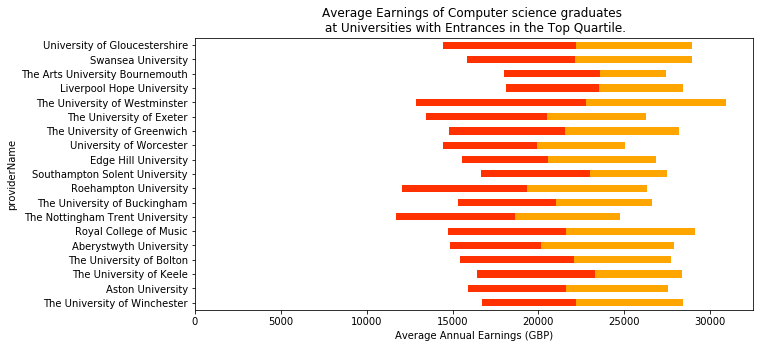

In [91]:
_, ax = plt.subplots(figsize = (10,5))
Hard_Universities.mean_upperAnnEarn.plot(kind='barh', ax=ax, alpha = 1.0, color= 'orange')
Hard_Universities.mean_medianAnnEarn.plot(kind='barh', ax=ax, alpha = 0.7, color='red')
Hard_Universities.mean_lowerAnnEarn.plot(kind='barh', ax=ax, color='white')
ax.set_xlabel("Average Annual Earnings (GBP)")
plt.title('Average Earnings of ' + str(Subject_Name) + ' graduates \n at Universities with Entrances in the Top Quartile.')

Text(0.5,1,'Average Earnings of Computer science graduates \n at Universities with Entrances in the Middle Two Quartiles.')

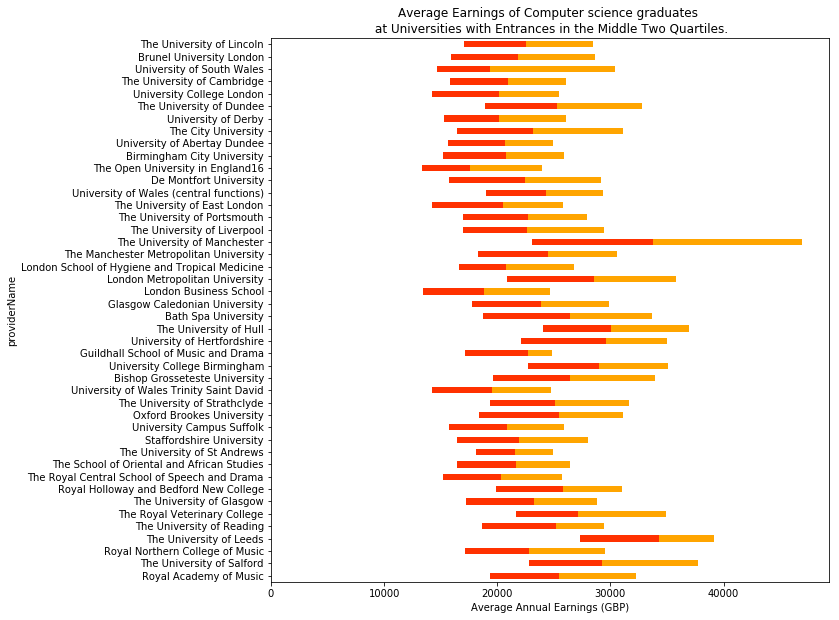

In [90]:
_, ax = plt.subplots(figsize = (10,10))
Middle_Universities.mean_upperAnnEarn.plot(kind='barh', ax=ax, alpha = 1.0, color= 'orange')
Middle_Universities.mean_medianAnnEarn.plot(kind='barh', ax=ax, alpha = 0.7, color='red')
Middle_Universities.mean_lowerAnnEarn.plot(kind='barh', ax=ax, color='white')
ax.set_xlabel("Average Annual Earnings (GBP)")
plt.figsize=(50,50)
plt.title('Average Earnings of ' + str(Subject_Name) + ' graduates \n at Universities with Entrances in the Middle Two Quartiles.')

Text(0.5,1,'Average Earnings of Computer science graduates \n at Universities with Entrances in the Bottom Quartile.')

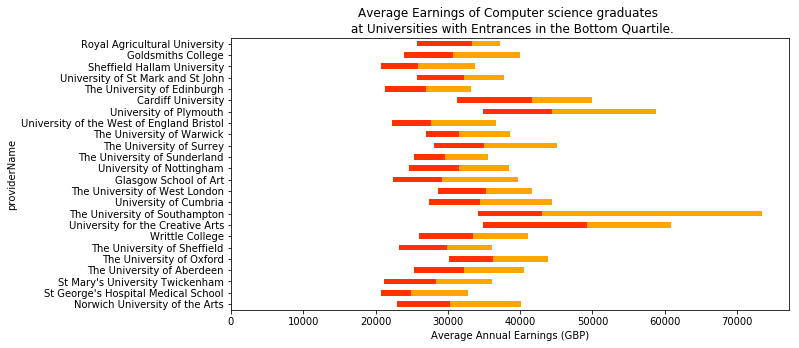

In [89]:
_, ax = plt.subplots(figsize = (10,5))
Easy_Universities.mean_upperAnnEarn.plot(kind='barh', ax=ax, alpha = 1.0, color= 'orange')
Easy_Universities.mean_medianAnnEarn.plot(kind='barh', ax=ax, alpha = 0.7, color='red')
Easy_Universities.mean_lowerAnnEarn.plot(kind='barh', ax=ax, color='white')
ax.set_xlabel("Average Annual Earnings (GBP)")
plt.title('Average Earnings of ' + str(Subject_Name) + ' graduates \n at Universities with Entrances in the Bottom Quartile.')